# ChatGPT Prompt Engineering for Developers

### 1. Guidelines for Prompting


we'll see two prompting principles and their related tactics in order to write effective prompts for large language models. I am using openai library and the `gpt-3.5-turbo` model.The notebook is set in Deeplearning.ai tutorial environment so i the API key is already set for the given environment. 

For running in your local machine or your environment use own API key ,  refer the link and also Use the code block below , paste your API key 

[How to get an OpenAI API key](https://www.windowscentral.com/software-apps/how-to-get-an-openai-api-key)

`import openai
openai.api_key = "...your API key here..."` 


In [6]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [7]:
# helper function,  we will use OpenAI's gpt-3.5-turbo model

def get_completion(prompt, model = 'gpt-3.5-turbo'):
    messages = [{"role": "user","content":prompt}]
    response = openai.ChatCompletion.create(
        model = model,
        messages = messages,
        temperature = 0, # degree of randomness
    )
    return response.choices[0].message["content"]
    

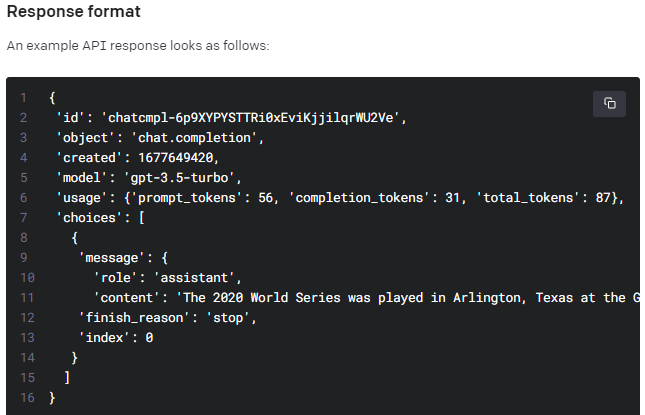

### Prompting principles 
* Write clear instructions 
* Give model time and space to think 

The reason GPT-3 fails on math problems is that , it should respond within the time it has to generate the next token. Giving the model enough time to think will make the response more accurate and better.
##### Tactics

**Tactic 1: Use delimiters to clearly indicate distinct parts of the input**
Use delimiters , like: `""" , <> , <tag> </tag>, ; , / `etc

Here is an example where we prompt a question from a short story called **Towrads Freedom** 

In [8]:
text = """ "Jana gana mana …" The schoolboy squirmed./
Another two minutes? He knew he should stand at attention./
The drillmaster's cane loomed large."Vindhya Himachal …"He grunted in discomfort./
This was unbearable. He considered making a dash; after all he was in the last row./
What if the master noticed? The cane loomed again. He gritted his teeth."Tava shubha …"This is it./
He cast his eyes around."Jaya he …"He started running."Jaya he …"He was almost there./
"Jaya he …"The chorus floated from afar./
He was already in the toilet, heaving a relieved sigh./"""

prompt = f""" What is this short story about? {text}"""

response = get_completion(prompt)
print(response)

The short story is about a schoolboy who is struggling to stand at attention during the national anthem. He considers making a dash for it but is afraid of getting caught by the drillmaster. In the end, he runs to the toilet to avoid standing for the anthem.


**Tactic 2: Ask for a structured output**

We can also ask the model to have provide structured output , lets say JSON here is an example of getting top ML courses to learn from in JSON and also a description about them

In [4]:
prompt = f"""Generate a list of top 3 Machine Learing courses to learn from.\
            Provide them in a JSON format with Name and Description.\
            the Description should have a 10 word review of the course"""

response = get_completion(prompt)
print(response)

{
  "courses": [
    {
      "name": "Machine Learning by Andrew Ng",
      "description": "A comprehensive introduction to machine learning. Highly recommended.",
    },
    {
      "name": "Applied Data Science with Python",
      "description": "Learn to apply machine learning techniques using Python. Practical and useful.",
    },
    {
      "name": "Deep Learning Specialization",
      "description": "A series of courses on deep learning. Challenging but rewarding.",
    }
  ]
}


**Tactic 3: Ask the model to check whether conditions are satisfied**

Give prompt where we ask the model to output in a step-by-step format , here is an example for making biriyani

In [13]:
text_1 = """ Making biriyani is easy you need to get some rice and/
            water , then boil the rice. Take chicken and apply /
            masala . Meanwhile take the rice and mix masala in it./
            After that take the chiken fry it and put it in rice./
            At the end add spices and serve hot."""

prompt = f"""You will be provided with a recipie for chicken biriyani.
            Re-create the recipie in a sequence of instructions like 
            Step 1 : ...
            Step 2 : ...
            Step 3 : ...
            ...
            Step N :
            If needed add more steps and ingredents to make the biriyani/
            more tasty.
            If the text is empty simple respind \"NONE"\ {text_1} """

response = get_completion(prompt)
print(response)

Step 1: Rinse 2 cups of basmati rice in cold water and soak it for 30 minutes.
Step 2: In a pot, bring 4 cups of water to a boil and add the soaked rice. Cook until the rice is 70% done.
Step 3: Drain the rice and set it aside.
Step 4: In a separate pan, heat 2 tablespoons of oil and add 2 sliced onions. Fry until golden brown.
Step 5: Add 1 tablespoon of ginger-garlic paste and fry for 1 minute.
Step 6: Add 2 chopped tomatoes and cook until they are soft.
Step 7: Add 1 teaspoon of turmeric powder, 1 teaspoon of red chili powder, 1 teaspoon of cumin powder, 1 teaspoon of coriander powder, and salt to taste. Mix well.
Step 8: Add 500 grams of chicken pieces and mix well. Cook until the chicken is tender.
Step 9: In a separate pan, heat 2 tablespoons of ghee and add 2 sliced onions. Fry until golden brown.
Step 10: Add the cooked chicken to the pan with the fried onions and mix well.
Step 11: In a large pot, layer the rice and chicken mixture. Start with a layer of rice, then a layer of 

Well that recipie was better and also notice how the output has been formated in the way specified.


**Tactic 4: "Few-shot" prompting**

Similar to `few-shot learning` , we give the model few exaples to learn, from which the model will further generate output.

In [11]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""                         

response = get_completion(prompt)
print(response)

<grandparent>: Resilience is like a tree that bends with the wind but never breaks. It is the ability to bounce back from adversity and keep moving forward, even when things get tough. Just like a tree that grows stronger with each storm it weathers, resilience is a quality that can be developed and strengthened over time.


### Give the model time to “think”

**Tactic 1: Specify the steps required to complete a task**

This also include asking the model for a specific outformat , this will help model slow down and think 

In [16]:
text = f"""This is an extremely popular story about a hare and a tortoise.\
The hare is an animal that is known to move quickly, while a tortoise is one to move slowly.\
One day, the hare challenged the tortoise to a race simply to prove that he was the best. The tortoise agreed.\
Once the race began the hare was easily able to get a head start. Upon realizing that the tortoise is far behind. 
The overconfident hare decided to take a nap.\
Meanwhile the tortoise, who was extremely determined and dedicated to the race was slowly nearing the finish line.\
The tortoise won the race while the hare napped. Most importantly he did it with humility and without arrogance."""

prompt = (f"""Perform the following tasks:
    1.summerize the story 
    2.translate the story into french
    3.list each name in the french story
    4.display it in JSON
    
     {text} """)

response = get_completion(prompt)
response

'1. The story is about a hare and a tortoise who have a race. The hare is overconfident and takes a nap during the race, while the tortoise slowly but steadily makes his way to the finish line and wins with humility.\n\n2. C\'est une histoire extrêmement populaire sur un lièvre et une tortue. Le lièvre est un animal connu pour se déplacer rapidement, tandis qu\'une tortue est connue pour se déplacer lentement. Un jour, le lièvre a défié la tortue à une course simplement pour prouver qu\'il était le meilleur. La tortue a accepté. Une fois que la course a commencé, le lièvre a facilement pu prendre de l\'avance. En réalisant que la tortue était loin derrière, le lièvre trop confiant a décidé de faire une sieste. Pendant ce temps, la tortue, qui était extrêmement déterminée et dédiée à la course, se rapprochait lentement de la ligne d\'arrivée. La tortue a remporté la course pendant que le lièvre dormait. Le plus important, c\'est qu\'il l\'a fait avec humilité et sans arrogance.\n\n3. Li

**Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion**

In [17]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct.


**Note that the student's solution is actually not correct.**


**We can fix this by instructing the model to work out its own solution first.**

In [18]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

Let x be the size of the installation in square feet.

Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 10x

Total cost: 100x + 250x + 100,000 + 10x = 360x + 100,000

Is the student's solution the same as actual solution just calculated:
No

Student grade:
Incorrect


See now the model is performing , LLMs outputs in mathematical problems can be improved greatly by giving the model "time to think" by asking it to go step by step.

## Model Limitations: Hallucinations


Hallucination is the word used to describe the situation when AI algorithms and deep learning neural networks create results that are not real, do not match any data the algorithm has been trained on, or do not follow any other discernible pattern.

Here is an example of an prompt asking the model to explain about toothbrush made by BMW , BMW never made toothbrush 

In [21]:
prompt = "Tell me in 50 words about the ultra slim eletric toothbrush called SportGT by BMW"
response = get_completion(prompt)
print(response)

The SportGT electric toothbrush by BMW is ultra slim and designed for on-the-go use. It features a powerful motor, long battery life, and a sleek design. The toothbrush is made with high-quality materials and is easy to use, making it a great choice for anyone looking for a high-performance toothbrush.


#### A note about the backslash
- backslash `\` is used to make the text fit on the screen without inserting newline '\n' characters.
- GPT-3 isn't really affected whether you insert newline characters or not.  But when working with LLMs in general, you may consider whether newline characters in your prompt may affect the model's performance.